In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [6]:
df = pd.read_excel(r'D:\ims proschool\python\Promtion Revenue.xlsx',engine='openpyxl')

In [9]:
df.describe()

,Serial,Promotion,Revenue
count,20.00000,20.000000,2.000000e+01
mean,10.50000,128880.000000,1.189934e+06
std,5.91608,31091.471161,1.264980e+05
min,1.00000,75600.000000,9.224160e+05
25%,5.75000,104400.000000,1.093242e+06
50%,10.50000,129600.000000,1.202532e+06
75%,15.25000,150300.000000,1.286487e+06
max,20.00000,180000.000000,1.407444e+06


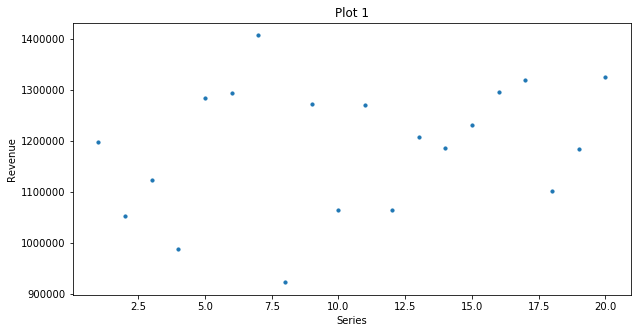

In [11]:
plt.figure(figsize=(10,5))
plt.title('Plot 1')
plt.xlabel('Series')
plt.ylabel('Revenue')
plt.scatter(x=df['Serial'],y=df['Revenue'],s=10)

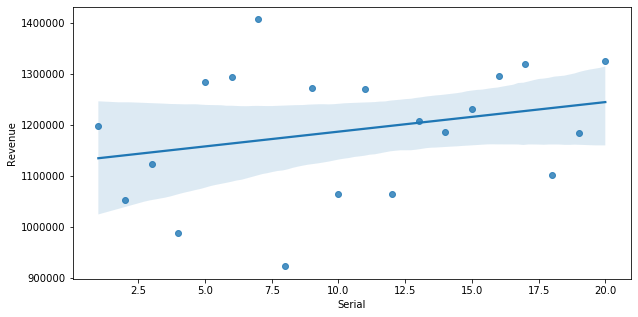

In [15]:
plt.figure(figsize=(10,5))
sns.regplot(x=df['Serial'],y=df['Revenue'])

In [17]:
lr=LinearRegression()

In [19]:
X= df['Promotion']
Y= df['Revenue']

In [20]:
X_arr=np.array(X).reshape(-1,1)

In [21]:
Y_arr=np.array(Y).reshape(-1,1)

In [22]:
lr.fit(X_arr,Y_arr)

LinearRegression()

In [23]:
print('intercept',lr.intercept_)
print('coefficient',lr.coef_)

intercept [985365.56731583]
coefficient [[1.58727679]]


In [25]:
X_arr = sm.add_constant(X_arr)

In [26]:
lr.fit(X_arr,Y_arr)
print('intercept',lr.intercept_)
print('coefficient',lr.coef_)

intercept [985365.56731583]
coefficient [[0.         1.58727679]]


In [27]:
result = sm.OLS(Y_arr,X_arr).fit()

In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     3.231
Date:                Mon, 08 Mar 2021   Prob (F-statistic):             0.0890
Time:                        15:12:47   Log-Likelihood:                -261.17
No. Observations:                  20   AIC:                             526.3
Df Residuals:                      18   BIC:                             528.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.854e+05   1.17e+05      8.429      0.000     7.4e+05    1.23e+06
x1             1.5873      0.883      1.798      0.089      -0.268       3.442
==============================================================================
Omnibus:                        0.905   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.726
Skew:                          -0.044   Prob(JB):                        0.695
Kurtosis:                       2.071   Cond. No.                     5.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""